In [2]:
import pickle
import matplotlib.pyplot as plt
# Notes: 
# Plot stage 0 total-trials minus violations

#pwm = A_df.copy()
#pwm.head()
#pwm1 = pwm.reset_index()
#pwm1.head()
#mask = pwm['stage']== 0
#pwm1 = pwm[mask]
#print(pwm1)
#pwm1 = pwm[pwm.stage==0]
#pwm1.head()
#print(pwm1)
#pwm2 = pwm1.unstack()
#pwm2.head()
#pwm2[pwm2.stage== 0]
#print(idx)

#stage_0 = pwm.loc[pwm['stage']==0]

#print(pwm[pwm['stage']==0])
#print(pwm_stage0)

#idx = pwm[pwm['stage'==0]].index.tolist()
#print(idx)
#print(idx[:])
#print(idx[-1])
#print(len(idx))
#pwm_idx = pwm.loc[idx[0]:'2019-05-20']
#print(pwm_idx)
# ideally find the index for stage = 0 and use this for the plotting
#pwm_stage0_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
#plt.xticks(rotation = 75, fontsize= 'medium')
#plt.xlim(['2019-04-26','2019-05-20'])
#print(plt.get_xlim*())
#plt.ylabel('Done Trials')
#plt.xlabel('Date')
#plt.title('Stage 0: Done trials for PWM animals')
#print(pwm_stage0_cp.index)


# load in file

In [4]:
pickle_in = open("Rot3_data\\Rat_full_df.pkl","rb")
pwm = pickle.load(pickle_in)
pwm = pwm.sort_index()  # sort according to index, this should sort according to date

pwm = pwm.rename_axis(['animal','date2'])  #Add labels for Multi-index
# Fix stages problem!!
mask = (pwm['stage']==1)&(pwm['A2_time']>0)
pwm['stage']=pwm['stage'].mask(mask,2)
#pwm.head()
#print(pwm.index)
# Include only animals which are on the PWM (s
# hould make this dependent on their settings file in the future
pwm = pwm.loc[['AA02','AA04','AA06','AA08','DO01','DO02','DO05','DO06','SC01','SC02','SC03','SC06','VP02','VP03','VP06']]

print("Succesfully loaded full rat dateframe as pwm, refined stage number and selected for animals")


Succesfully loaded full rat dateframe as pwm, refined stage number and selected for animals


In [7]:
%matplotlib inline
A_df = pwm # use the pwm dataframe
A_df = A_df.swaplevel('animal','date2')
A_df = A_df.reset_index()  # In order to delete duplicates 
# remove duplicates
dup_r = A_df[A_df.duplicated(['date2','animal'])]
#print('dub is:',dup_r)
A_df = A_df.drop_duplicates(['date2','animal'])
dup_r = A_df[A_df.duplicated(['date2','animal'])]  # Run a little double check
#print('dub is:',dup_r)
# Put the dataframe nicely together again
A_df = A_df.set_index(['date2','animal'])
A_df = A_df.sort_index()
A_df = A_df.unstack()
print("Removed duplicates (print statements are off), swapped levels and unstacked. Head of A_df is:")
A_df.head()




Removed duplicates (print statements are off), swapped levels and unstacked. Head of A_df is:


file  \
animal                                               AA02   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA02_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA02_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA02_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA02_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA02_190501a.mat   

                                                           \
animal                                               AA04   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA04_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA04_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA04_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA04_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA04_190501a.mat   

                                                           \
animal                                               AA06   
date2                                                       
2019-04-25  data_@AthenaDelayComp_athena_AA06_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA06_190426a.mat   
2019-04-29  data_@AthenaDelayComp_athena_AA06_190429a.mat   
2019-04-30  data_@AthenaDelayComp_athena_AA06_190430a.mat   
2019-05-01  data_@AthenaDelayComp_athena_AA06_190501a.mat   

                                                              \
animal                                                  AA08   
date2                                                          
2019-04-25     data_@AthenaDelayComp_athena_AA08_190425a.mat   
2019-04-26  data_@AthenaDelayComp_athena_AA08_190426_ASV.mat   
2019-04-29     data_@AthenaDelayComp_athena_AA08_190429a.mat   
2019-04-30     data_@AthenaDelayComp_athena_AA08_190430a.mat   
2019-05-01     data_@AthenaDelayComp_athena_AA08_190501a.mat   

                                                          \
animal                                              DO01   
date2                                                      
2019-04-25  data_@AthenaDelayComp_dammy_DO01_190425a.mat   
2019-04-26  data_@AthenaDelayComp_dammy_DO01_190426a.mat   
2019-04-29  data_@AthenaDelayComp_dammy_DO01_190429a.mat   
2019-04-30  data_@AthenaDelayComp_dammy_DO01_190430a.mat   
2019-05-01  data_@AthenaDelayComp_dammy_DO01_190501a.mat   

                                                          \
animal                                              DO02   
date2                                                      
2019-04-25  data_@AthenaDelayComp_dammy_DO02_190425a.mat   
2019-04-26  data_@AthenaDelayComp_dammy_DO02_190426a.mat   
2019-04-29  data_@AthenaDelayComp_dammy_DO02_190429a.mat   
2019-04-30  data_@AthenaDelayComp_dammy_DO02_190430a.mat   
2019-05-01                                           NaN   

                                                               \
animal                                              DO05 DO06   
date2                                                           
2019-04-25  data_@AthenaDelayComp_dammy_DO05_190425a.mat  NaN   
2019-04-26  data_@AthenaDelayComp_dammy_DO05_190426a.mat  NaN   
2019-04-29  data_@AthenaDelayComp_dammy_DO05_190429a.mat  NaN   
2019-04-30  data_@AthenaDelayComp_dammy_DO05_190430a.mat  NaN   
2019-05-01  data_@AthenaDelayComp_dammy_DO05_190501a.mat  NaN   

                                                            \
animal                                                SC01   
date2                                                        
2019-04-25  data_@AthenaDelayComp_sharbat_SC01_190425a.mat   
2019-04-26  data_@AthenaDelayComp_sharbat_SC01_190426a.mat   
2019-04-29  data_@AthenaDelayComp_sharbat_SC01_190429a.mat   
2019-04-30  data_@AthenaDelayComp_sharbat_SC01_190430a.mat   
2019-05-01  data_@AthenaDelayComp_sharbat_SC01_190501a.mat   

                                                            ... hits_total  \
animal         

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['axes.facecolor'] = '555555'
plt.rcParams['text.color'] = 'white'
#plt.rcParams['axes.prop_cycle'] = 'RdPu' # this dosen't do anything atm 
# for individual: ax.set_axis_bgcolor('')



In [35]:
A_cp = A_df['total_CP']
A_cp.head()
A_cp.plot(marker='o',linewidth = 1.0, markersize = 2.5,cmap=plt.cm.RdPu)
plt.xticks( rotation = 75, fontsize= 'medium')
plt.ylabel('Total CP')
plt.xlabel('Date')
plt.title('Total_CP over time for each PWM animal')
plt.close()



In [36]:
pwm = A_df.copy()
mask = pwm['stage']== 0
pwm1 = pwm[mask]
pwm_stage0 = pwm1
pwm_stage0.head()
pwm_stage0_cp = pwm_stage0['done_trials']
# pwm_real = pwm_stage0['done_trials'] - (pwm_stage0['done_trials']* pwm_stage0['violations'])
# would maybe be an idea to perform this operation higher up. 
list = pwm_stage0_cp.columns.values # get list to use for labelling
# plt.plot instead of df.plot fixed my problem with the x-axis, but the colors are worse, and legends are gone
# ideally figure out how to fix things in either
plt.plot(pwm_stage0_cp, marker='o',linewidth = 1.0, markersize = 2.5) #cmap=plt.cm.RdPu)
plt.legend(list)
plt.ylabel('Done Trials') 
plt.xlabel('Date')
plt.title('Stage 0: Done trials for PWM animals')
plt.close()
# figure out:
# how to change line colors by making a loop
# colormap = cmap=plt.cm.RdPu



In [37]:
# Stage 1 
pwm_st1 = A_df.copy()
mask = pwm_st1['stage']== 1
pwm_stage1 = pwm_st1[mask] #pwm_stage1 df defined
pwm_stage1_dt = pwm_stage1['done_trials'] - (pwm_stage1['done_trials']* pwm_stage1['violations'])
list = pwm_stage1_dt.columns.values
plt.plot(pwm_stage1_dt, marker='o',linewidth = 1.0, markersize = 2.5)
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Done trials - violations') 
plt.ylim([0,500])
plt.xlabel('Date')
plt.title('Stage 1: Done trials for PWM animals (minus violations)')
plt.close()


In [38]:
pwm_stage1_dt2 = pwm_stage1['done_trials']
plt.plot(pwm_stage1_dt2, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_dt2.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Done trials') 
plt.ylim([0,500])
plt.xlabel('Date')
plt.title('Stage 1: Done trials for PWM animals (with violations)')
plt.close()
# would be cool to maybe include see the stages in extension of each other. 


In [39]:
pwm_stage1_vio = (pwm_stage1['done_trials']* pwm_stage1['violations'])
plt.plot(pwm_stage1_vio, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_vio.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Violations') 
plt.ylim([0,500])
plt.xlabel('Date')
plt.title('Stage 1: Violations for each PWM animal')
plt.close()




In [40]:
pwm_stage1_cp = pwm_stage1['total_CP']
plt.plot(pwm_stage1_cp, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_cp.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('CP duration') 
plt.xlabel('Date')
plt.title('Stage 1: CP duration for each PWM animal')
plt.close()


In [41]:
pwm_stage1_tm = (pwm_stage1['done_trials']* pwm_stage1['timeouts'])
plt.plot(pwm_stage1_tm, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_tm.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Timeouts (nTrials)') 
plt.xlabel('Date')
plt.title('Stage 1: Timeout trials for each PWM animal')
plt.close()



Text(0.5, 1.0, 'Stage 1: Left hits for each PWM animal')

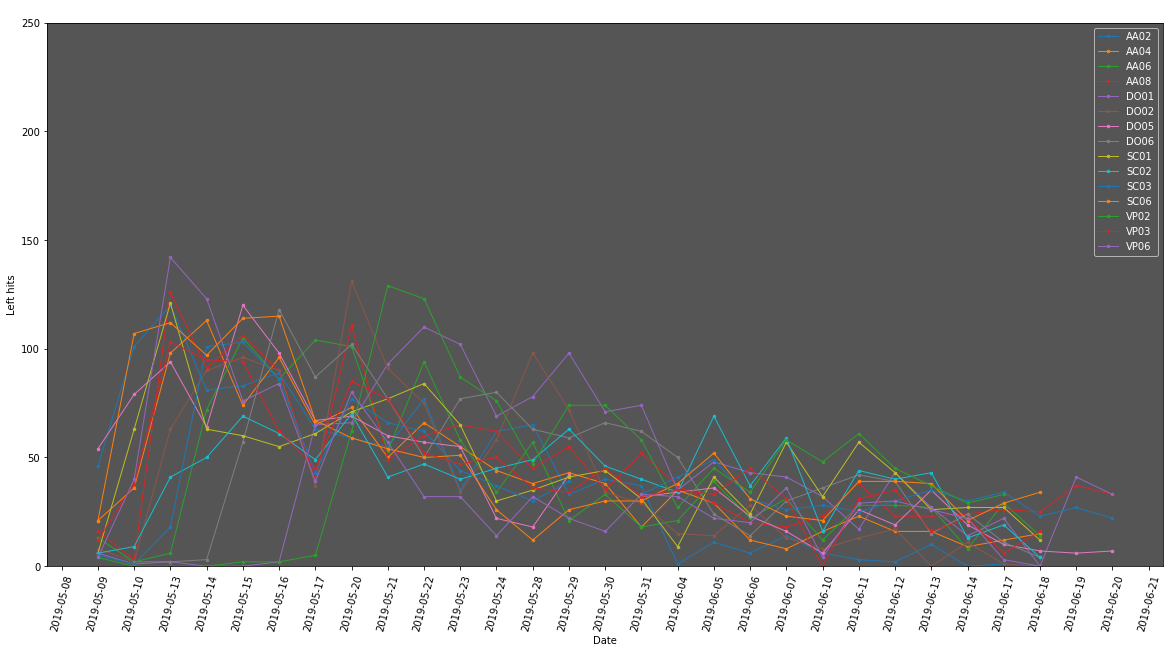

In [32]:
pwm_stage1_l = pwm_stage1['left_trials'] #so its almost the same as hits*trials
plt.plot(pwm_stage1_l, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_l.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Left hits') 
plt.ylim([0,250])
plt.xlabel('Date')
plt.title('Stage 1: Left hits for each PWM animal')
pwm_stage1_l = pwm_stage1['left_trials'] #so its almost the same as hits*trials
plt.plot(pwm_stage1_l, marker='o',linewidth = 1.0, markersize = 2.5)
list = pwm_stage1_l.columns.values
plt.xticks( rotation = 75, fontsize= 'medium')
plt.legend(list)
plt.ylabel('Left hits') 
plt.ylim([0,250])
plt.xlabel('Date')
plt.title('Stage 1: Left hits for each PWM animal')